In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv('/data.csv', encoding='latin-1')
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
data_description = df.describe()
print("\nData Description:\n", data_description)

dimension = df.shape
print("\nDimension of the dataset:", dimension)








Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data Description:
             Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Dimension of the dataset: (541909, 8)


In [ ]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [ ]:
scaler = MinMaxScaler()
# Reshape the column before scaling
numeric_column_values = df['UnitPrice'].values.reshape(-1, 1)
df['numeric_column_normalized'] = scaler.fit_transform(numeric_column_values)

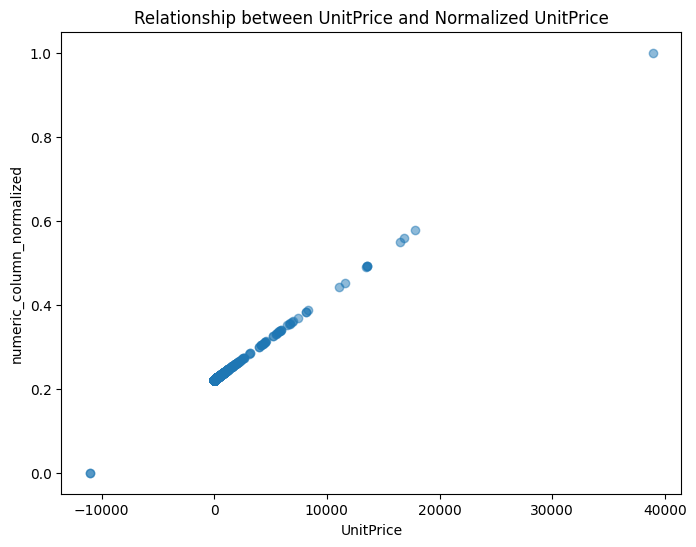

Correlation between UnitPrice and Normalized UnitPrice: 0.9999999999999978
           UnitPrice  numeric_column_normalized
count  541909.000000              541909.000000
mean        4.611114                   0.221192
std        96.759853                   0.001934
min    -11062.060000                   0.000000
25%         1.250000                   0.221124
50%         2.080000                   0.221141
75%         4.130000                   0.221182
max     38970.000000                   1.000000


In [ ]:
# 1. Visualize the relationship using a scatter plot:
plt.figure(figsize=(8, 6))
plt.scatter(df['UnitPrice'], df['numeric_column_normalized'], alpha=0.5)  # alpha for transparency
plt.xlabel('UnitPrice')
plt.ylabel('numeric_column_normalized')
plt.title('Relationship between UnitPrice and Normalized UnitPrice')
plt.grid(False)
plt.show()

# 2. Calculate the correlation between the two columns:
correlation = df['UnitPrice'].corr(df['numeric_column_normalized'])
print(f"Correlation between UnitPrice and Normalized UnitPrice: {correlation}")

# 3. Optionally, you can explore the data further using descriptive statistics:
print(df[['UnitPrice', 'numeric_column_normalized']].describe())

1. Scatter Plot Analysis:

The scatter plot visually depicts the relationship between the original UnitPrice and the normalized numeric_column_normalized. Here's what we can typically infer from it:

Linear Relationship: If the points on the scatter plot roughly form a straight line, it suggests a linear relationship between the two variables. This means changes in UnitPrice correspond to proportional changes in numeric_column_normalized.
Non-Linear Relationship: If the points form a curve or a complex pattern, it indicates a non-linear relationship. Min-Max scaling preserves the original data distribution, so non-linear patterns in the original data will be reflected in the normalized data as well.
Outliers: Any points significantly far from the main cluster might represent outliers in your data, which can be worth investigating further.
2. Correlation Analysis:

The correlation coefficient provides a numerical measure of the linear relationship:

Positive Correlation: A positive value close to +1 indicates a strong positive linear relationship, meaning that as UnitPrice increases, numeric_column_normalized also tends to increase.
Negative Correlation: A negative value close to -1 indicates a strong negative linear relationship, where an increase in UnitPrice corresponds to a decrease in numeric_column_normalized. This is unlikely in this case since Min-Max scaling preserves the order of values.
Weak or No Correlation: A value close to 0 suggests a weak or no linear relationship between the variables.
3. Descriptive Statistics Analysis:

The describe() function provides summary statistics:

Range: You can compare the minimum and maximum values of UnitPrice and numeric_column_normalized to see how the range has been transformed. After Min-Max scaling, the normalized values should fall within the range of 0 to 1.
Distribution: Comparing the mean, standard deviation, and quartiles can give you insights into how the distribution of the data has been affected by normalization. Min-Max scaling tends to compress the data within the 0-1 range, potentially altering the shape of the distribution.
Interpreting in your context

Based on these analyses, you'll get a better understanding of:

The type of relationship between UnitPrice and its normalized counterpart. It's likely a strong positive linear relationship since Min-Max scaling proportionally scales data.
How the distribution of values has changed after normalization.
Any potential outliers in your UnitPrice data. **bold text**

In [ ]:
# 1. Group by 'Country' and aggregate 'UnitPrice' and 'Quantity'
country_price_quantity = df.groupby('Country').agg(
    {'UnitPrice': ['mean', 'median', 'min', 'max'],
     'Quantity': ['sum', 'mean', 'median', 'min', 'max']}
)

# 2. Flatten the multi-level column index for better readability
country_price_quantity.columns = ['_'.join(col) for col in country_price_quantity.columns]
country_price_quantity = country_price_quantity.reset_index()

# 3. Display the results
print(country_price_quantity)

columns_to_normalize = [ col for col in country_price_quantity.columns if col not in ['Country']]
scaler = MinMaxScaler()
country_price_quantity[columns_to_normalize] = scaler.fit_transform(country_price_quantity[columns_to_normalize])

print(country_price_quantity)

                 Country  UnitPrice_mean  UnitPrice_median  UnitPrice_min  \
0              Australia        3.220612             1.790           0.00   
1                Austria        4.243192             1.950           0.12   
2                Bahrain        4.556316             3.810           1.25   
3                Belgium        3.644335             1.950           0.12   
4                 Brazil        4.456250             3.320           0.85   
5                 Canada        6.030331             1.650           0.10   
6        Channel Islands        4.932124             2.550           0.19   
7                 Cyprus        6.302363             2.950           0.12   
8         Czech Republic        2.938333             1.450           0.29   
9                Denmark        3.256941             1.950           0.21   
10                  EIRE        5.911077             2.100           0.00   
11    European Community        4.820492             3.350           0.55   

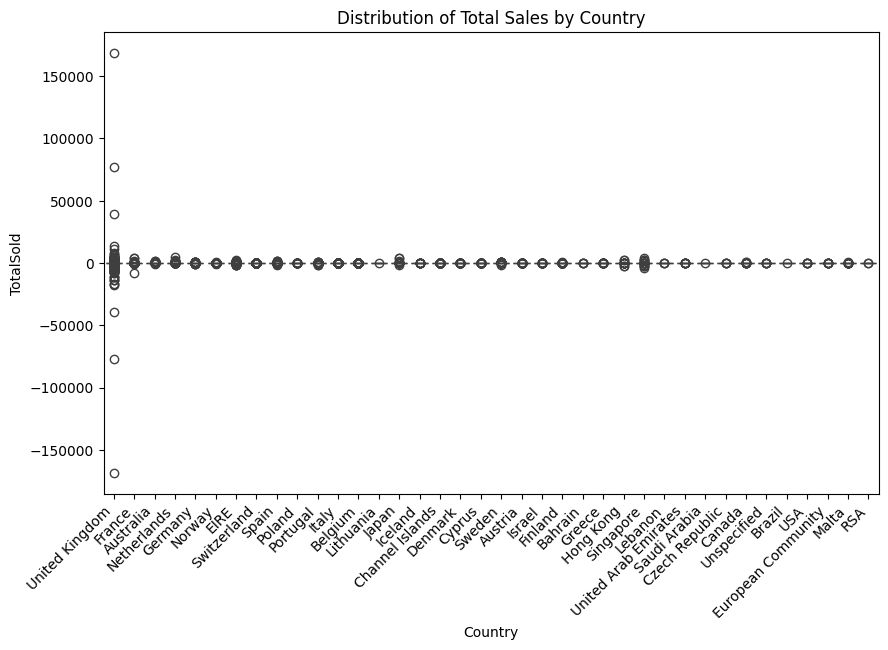

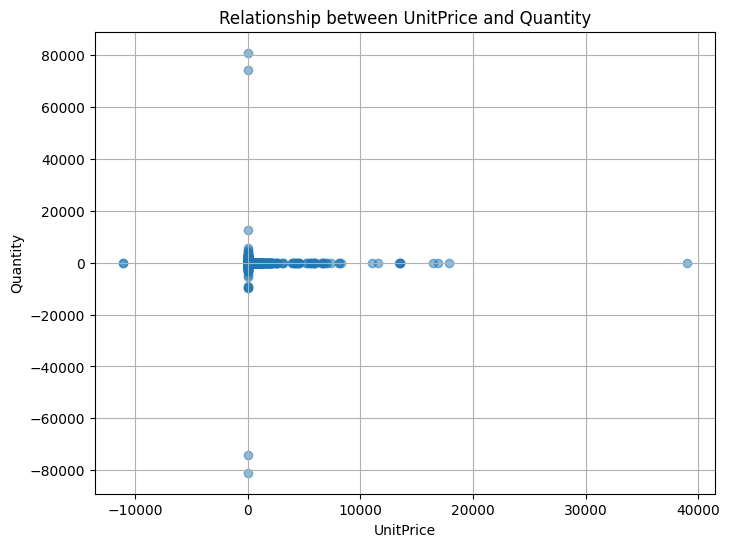

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


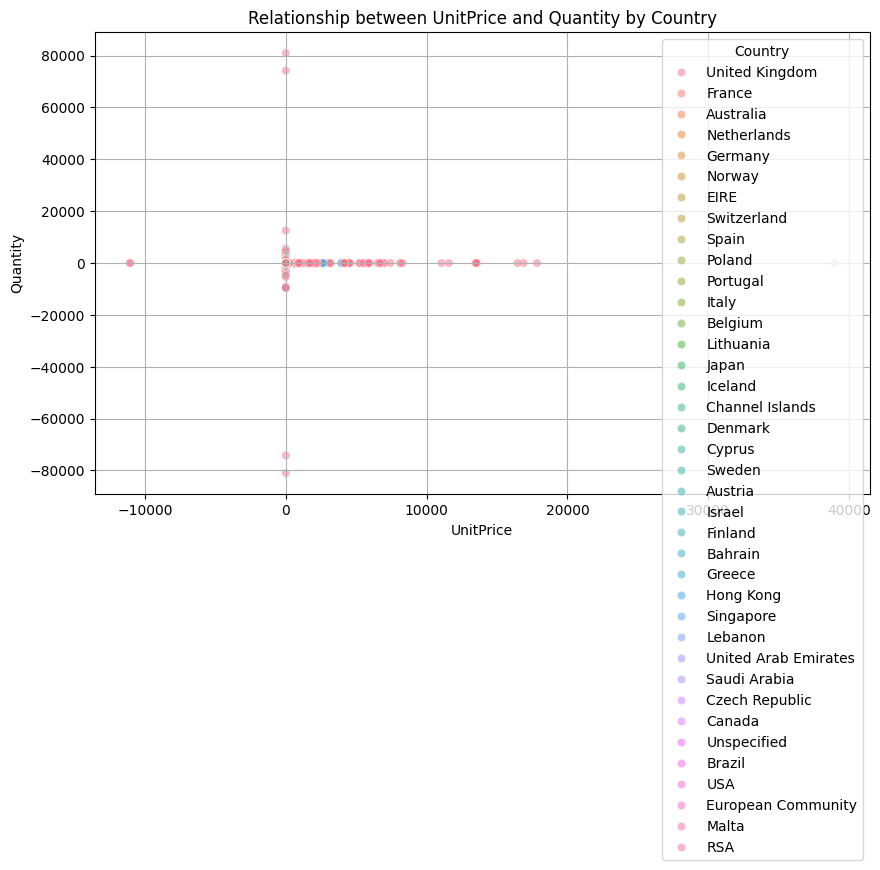

In [ ]:
 #1. Prepare the data:
df['TotalSold'] = df['UnitPrice'] * df['Quantity']  # Calculate TotalSold for each transaction


# 2. Box plot for TotalSold distribution:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='TotalSold', data=df)  # Using seaborn for a more informative box plot
plt.title('Distribution of Total Sales by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# 3. Scatter plot for UnitPrice vs Quantity:
plt.figure(figsize=(8, 6))
plt.scatter(df['UnitPrice'], df['Quantity'], alpha=0.5)
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Relationship between UnitPrice and Quantity')
plt.grid(True)
plt.show()

# 4. Optional: Scatter plot with Country as hue:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', hue='Country', data=df, alpha=0.5)
plt.title('Relationship between UnitPrice and Quantity by Country')
plt.grid(True)
plt.show()

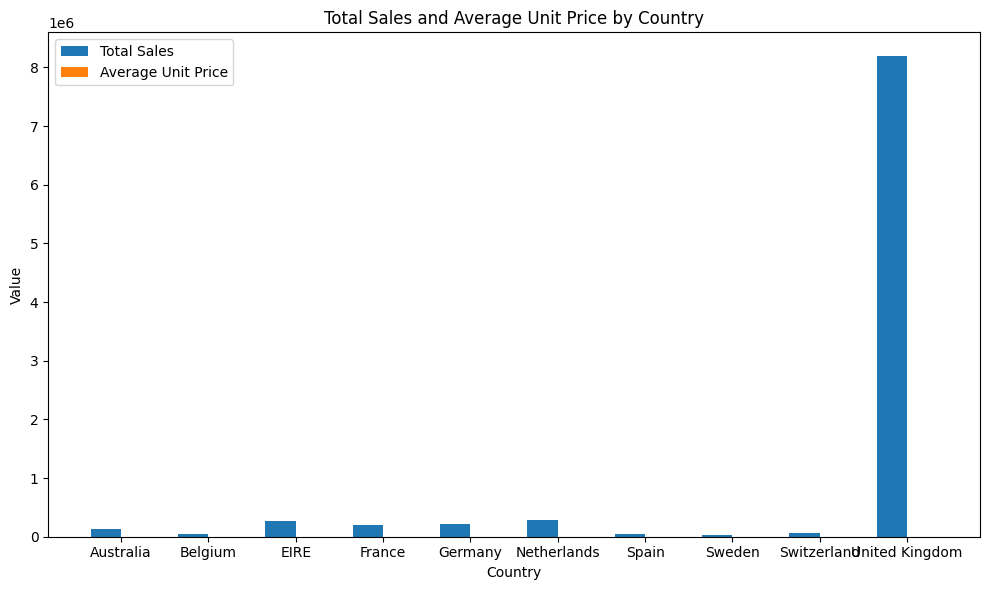

In [ ]:
top_10_country = df.groupby('Country')['TotalSold'].sum().nlargest(10)

filter_df = df[df['Country'].isin(top_10_country.index)]


country_data = filter_df.groupby('Country').agg(
    TotalSales=('TotalSold', 'sum'),
    AvgUnitPrice=('UnitPrice', 'mean')
)

countries = country_data.index
total_sales = country_data['TotalSales']
avg_unit_price = country_data['AvgUnitPrice']

x = np.arange(len(countries))
width = 0.35

fig, ax= plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, total_sales, width, label='Total Sales')
rects2 = ax.bar(x + width/2, avg_unit_price, width, label='Average Unit Price')

ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Total Sales and Average Unit Price by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

fig.tight_layout()
plt.show()
